# Notebook to read a dataset and do basic field statistics and distributions

Note that if you want to make distributions for a DQR you will need to modify this notebook, in particular 
make a custom picture for each field that uses good choices of ranges and log scale.

In [90]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()
print('LOAD DURATION: ', dt.datetime.now() - start_time)

LOAD DURATION:  0:00:00.000032


In [91]:
# if you want to see all the library versions loaded:
# %pip list

In [92]:
%%time
data = pd.read_csv('card transactions.csv')

CPU times: user 141 ms, sys: 4.04 ms, total: 145 ms
Wall time: 225 ms


In [93]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


## `Info`

In [94]:
data.dropna(how='all', axis=1, inplace=True) # drop any empty columns
print('data.shape=', data.shape)
print(data.info())
data.head().transpose()

data.shape= (97852, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97852 entries, 0 to 97851
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             97852 non-null  int64  
 1   Cardnum            97852 non-null  int64  
 2   Date               97852 non-null  object 
 3   Merchnum           94455 non-null  object 
 4   Merch description  97852 non-null  object 
 5   Merch state        96649 non-null  object 
 6   Merch zip          93149 non-null  float64
 7   Transtype          97852 non-null  object 
 8   Amount             97852 non-null  float64
 9   Fraud              97852 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.5+ MB
None


,0,1,2,3,4
Recnum,1,2,3,4,5
Cardnum,5142190439,5142183973,5142131721,5142148452,5142190439
Date,1/1/10,1/1/10,1/1/10,1/1/10,1/1/10
Merchnum,5509006296254,61003026333,4503082993600,5509006296254,5509006296254
Merch description,FEDEX SHP 12/23/09 AB#,SERVICE MERCHANDISE #81,OFFICE DEPOT #191,FEDEX SHP 12/28/09 AB#,FEDEX SHP 12/23/09 AB#
Merch state,TN,MA,MD,TN,TN
Merch zip,38118.0,1803.0,20706.0,38118.0,38118.0
Transtype,P,P,P,P,P
Amount,3.62,31.42,178.49,3.62,3.62
Fraud,0,0,0,0,0


In [95]:
data.tail().transpose()

,97847,97848,97849,97850,97851
Recnum,97848,97849,97850,97851,97852
Cardnum,5142276053,5142225701,5142226486,5142244619,5142243247
Date,12/31/10,12/31/10,12/31/10,12/31/10,12/31/10
Merchnum,3500000006160,8090710030950,4503057341100,8834000695412,9108347680006
Merch description,BEST BUY 00001610,MARKUS OFFICE SUPPLIES,"TECH PAC, INC",BUY.COM,STAPLES NATIONAL #471
Merch state,KY,OH,OH,CA,NJ
Merch zip,41042.0,45248.0,45150.0,92656.0,7606.0
Transtype,P,P,P,P,P
Amount,84.79,118.75,363.56,2202.03,554.64
Fraud,0,0,0,0,0


In [96]:
# # add a dummy categorical column for the case the fields all look numeric
# data['dummy'] = 'temp'

## `Counts, Nulls, % of populated`

In [97]:
df_stats = pd.DataFrame(data.count(),columns=['count'])
df_stats['isna'] = data.isna().sum()
df_stats['% pop'] = 1 - data.isna().sum()/len(data)
df_stats

,count,isna,% pop
Recnum,97852,0,1.000000
Cardnum,97852,0,1.000000
Date,97852,0,1.000000
Merchnum,94455,3397,0.965284
Merch description,97852,0,1.000000
Merch state,96649,1203,0.987706
Merch zip,93149,4703,0.951938
Transtype,97852,0,1.000000
Amount,97852,0,1.000000
Fraud,97852,0,1.000000


## `Statistical Descriptions`

In [98]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Recnum,97852.0,NaN,NaN,NaN,48926.5,28247.583608,1.0,24463.75,48926.5,73389.25,97852.0
Cardnum,97852.0,NaN,NaN,NaN,5142201749.891356,55560.78661,5142110002.0,5142152067.0,5142195612.0,5142245485.0,5142847398.0
Date,97852,365,2/28/10,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merchnum,94455,13091,930090121224,9419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch description,97852,13126,GSA-FSS-ADV,1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch state,96649,227,TN,12169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch zip,93149.0,NaN,NaN,NaN,44684.186368,28371.722354,1.0,20855.0,38118.0,63103.0,99999.0
Transtype,97852,4,P,97497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,97852.0,NaN,NaN,NaN,425.466438,9949.850694,0.01,33.38,137.4,425.82,3102045.53
Fraud,97852.0,NaN,NaN,NaN,0.020919,0.143115,0.0,0.0,0.0,0.0,1.0


### Make best guess to automatically set numerics or categoricals

In [99]:
from datetime import datetime

data['Recnum'] = data['Recnum'].astype('category')
data['Cardnum'] = data['Cardnum'].astype('category')
data['Date'] = pd.to_datetime(data['Date'])
data['Merch zip'] = data['Merch zip'].astype('category')

/tmp/ipykernel_12926/4180874962.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [100]:
numerics = data.select_dtypes(['int64', 'float64'])
categoricals = data.select_dtypes(['category', 'object'])
temporal = data.select_dtypes('datetime')
            
print('numerics:',numerics.columns.tolist())     
print('\ncategoricals:',categoricals.columns.tolist())     
print('\ntemporal:',temporal.columns.tolist())     

numerics: ['Amount', 'Fraud']

categoricals: ['Recnum', 'Cardnum', 'Merchnum', 'Merch description', 'Merch state', 'Merch zip', 'Transtype']

temporal: ['Date']


In [101]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

### `Numeric`

In [102]:
statistics_of_data1 = []
for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0]
                             ))

stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx', index=False)
stats_dfnum

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Mean,Standard Deviation,Most Common
0,Amount,numeric,97852,100.0%,0,0.01,3102045.53,425.466438,9949.80,3.62
1,Fraud,numeric,97852,100.0%,95805,0.00,1.00,0.020919,0.14,0.00


### `Category`

In [103]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_dfcat = pd.DataFrame(statistics_of_data, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_dfcat.to_excel('categoricals table.xlsx',index=False)
stats_dfcat

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,Recnum,categorical,97852,100.0%,0,97852,1
1,Cardnum,categorical,97852,100.0%,0,1645,5142148452
2,Merchnum,categorical,94455,96.5%,0,13091,930090121224
3,Merch description,categorical,97852,100.0%,0,13126,GSA-FSS-ADV
4,Merch state,categorical,96649,98.8%,0,227,TN
5,Merch zip,categorical,93149,95.2%,0,4567,38118.0
6,Transtype,categorical,97852,100.0%,0,4,P


### `Temporal`

In [104]:
temp = []
for col in temporal:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    temp.append((col,
                             'datetime',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             data[col].min(),
                             data[col].max(),
                             data[col].mode()[0]
                             ))

stats_dftime = pd.DataFrame(temp, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','Most Early', 'Most Late', 'Most Common'])
stats_dftime.to_excel('temp table.xlsx', index=False)
stats_dftime

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Most Early,Most Late,Most Common
0,Date,datetime,97852,100.0%,0,2010-01-01,2010-12-31,2010-02-28


`Amount`

In [105]:
# Outliers
thresh = 3 * data['Amount'].std() + data['Amount'].mean()
thresh

30275.018520582187

In [106]:
from scipy.stats import zscore

data[(zscore(data['Amount']) > 3) | (zscore(data['Amount']) < -3)]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
47754,47755,5142275225,2010-06-22,NaN,INTERSOL,NaN,NaN,P,47900.00,0
53178,53179,5142189135,2010-07-13,NaN,INTERMEXICO,NaN,NaN,P,3102045.53,0
60146,60147,5142138135,2010-08-03,900009045549,KRACKELER SCIENTIFIC,NY,12202.0,P,30372.46,1


In [107]:
data[data['Amount']>2500]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
99,100,5142121593,2010-01-03,4591200814444,DELL MARKETING L.P.,TX,78682.0,P,2835.00,0
159,160,5142182016,2010-01-03,7965600643306,"ACCUSTANDARD, INC",CT,6513.0,P,2969.25,0
175,176,5142127276,2010-01-03,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,4444.00,0
335,336,5142189945,2010-01-04,8834000695412,BUY.COM,CA,92656.0,P,5112.19,0
814,815,5142187245,2010-01-05,6023466260993,MCNAUGHTON MCKAY ELECT,MI,48108.0,P,4195.06,0
...,...,...,...,...,...,...,...,...,...,...
97139,97140,5142127276,2010-12-28,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,4228.00,0
97292,97293,5142183210,2010-12-28,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,4950.00,0
97296,97297,5142189945,2010-12-28,2036100687150,"GE REUTER-STOKES, INC",OH,44087.0,P,24845.00,0
97462,97463,5142189945,2010-12-29,188700635059,PACKARD INSTRUMENT CO INC,CT,6450.0,P,6200.00,0


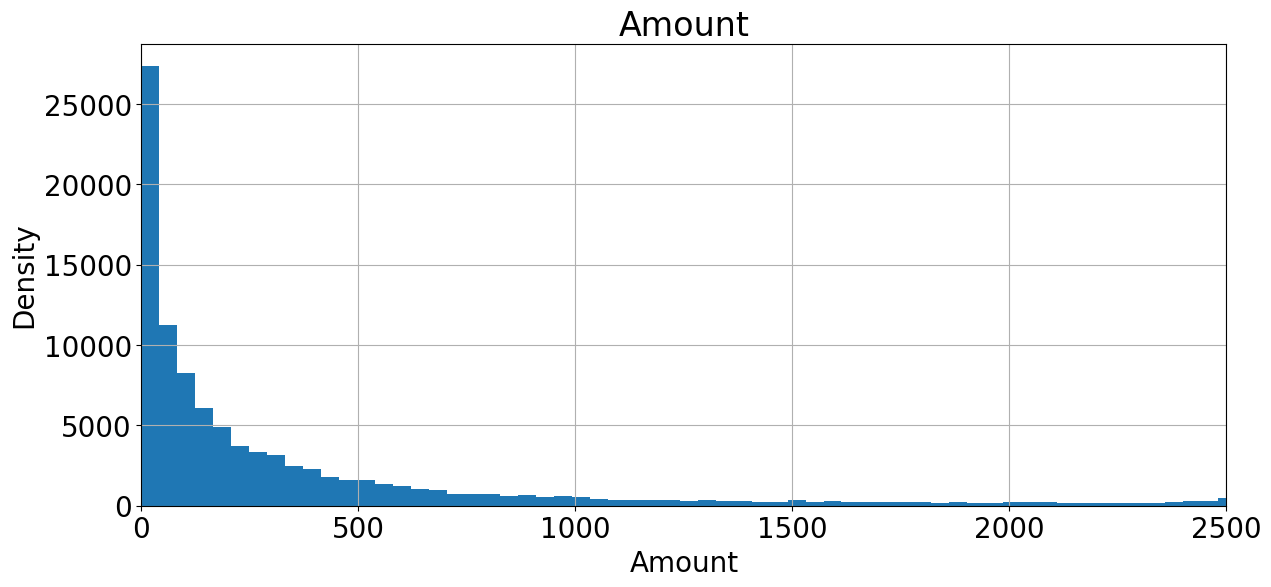

In [108]:
plt.hist(data['Amount'], bins=75000)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Amount')
plt.xlim(0, 2500)
plt.grid()

plt.show()

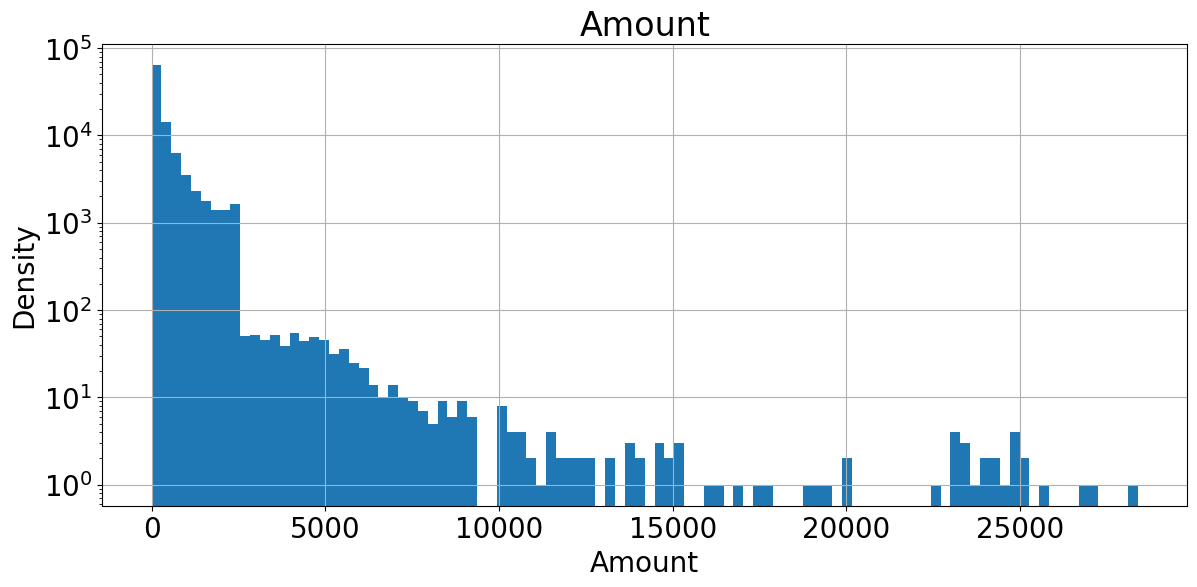

In [109]:
plt.hist(data[data['Amount']<thresh]['Amount'], bins=100, log=True)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Amount')
plt.grid()

plt.show()

`Fraud` (Label)

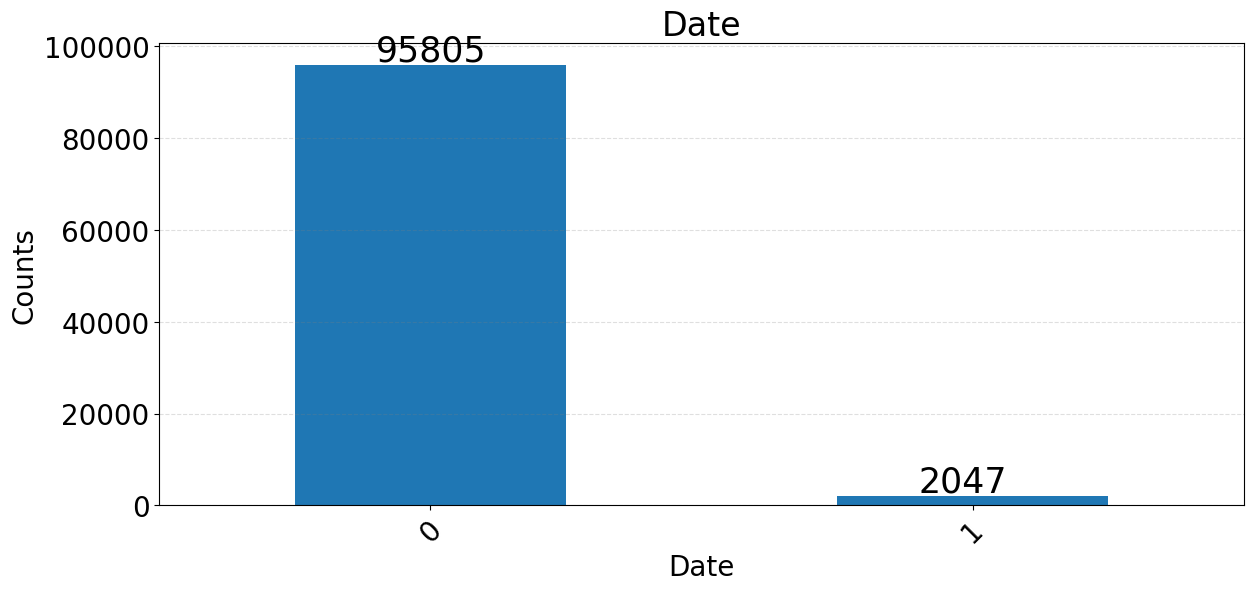

In [110]:
counts = data['Fraud'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=45)
for i, v in enumerate(counts):  # loop thru the bars
    ax.text(i - 0.1, v + counts.max()*0.01, f"{v}", color='black', fontsize=25)
plt.title(col)
plt.xlabel(col)
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.show()

## Categorical

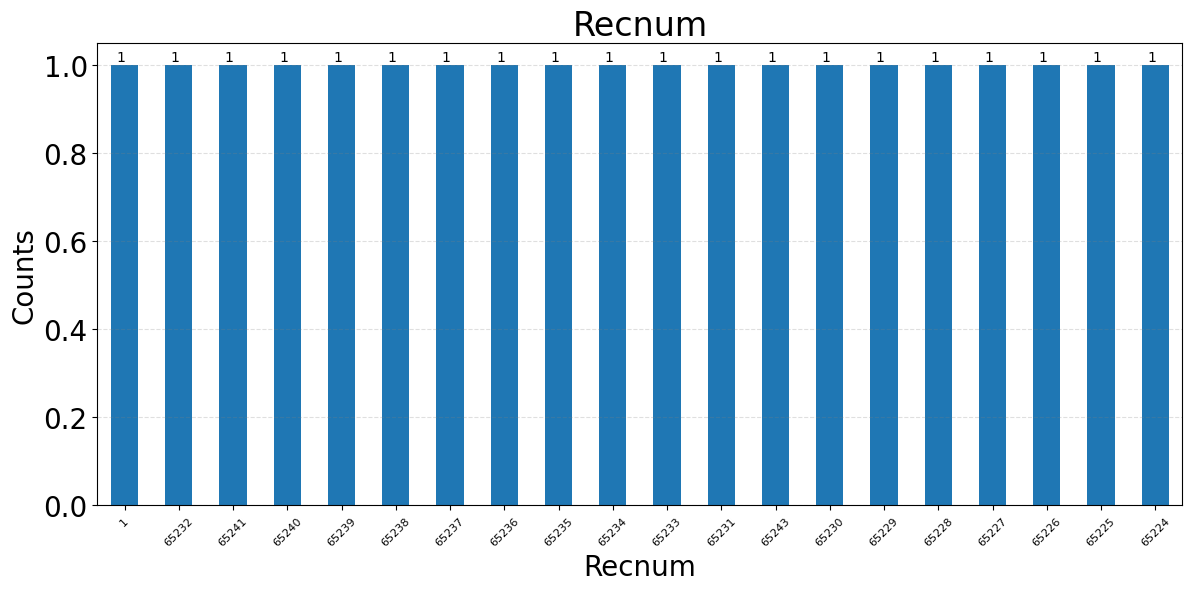

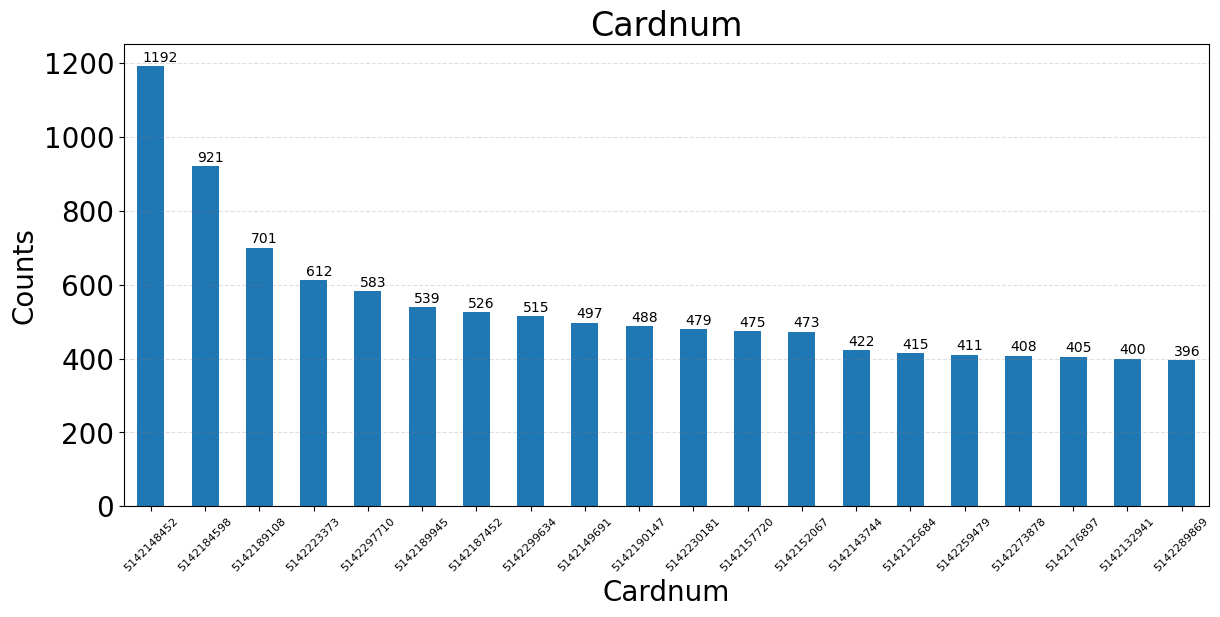

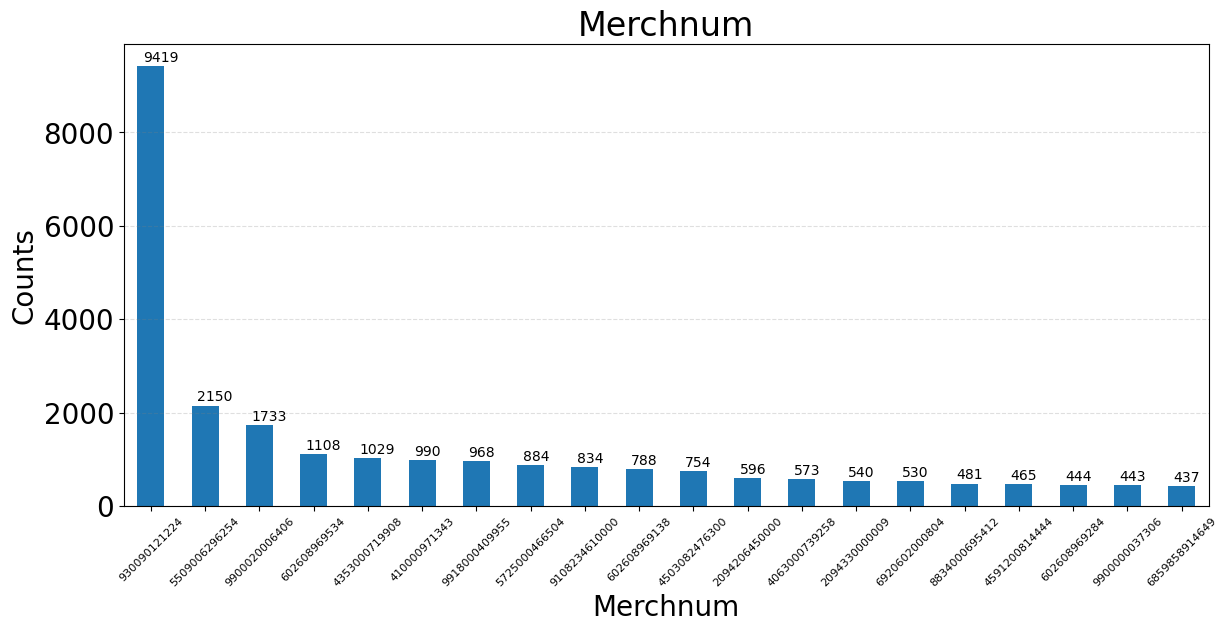

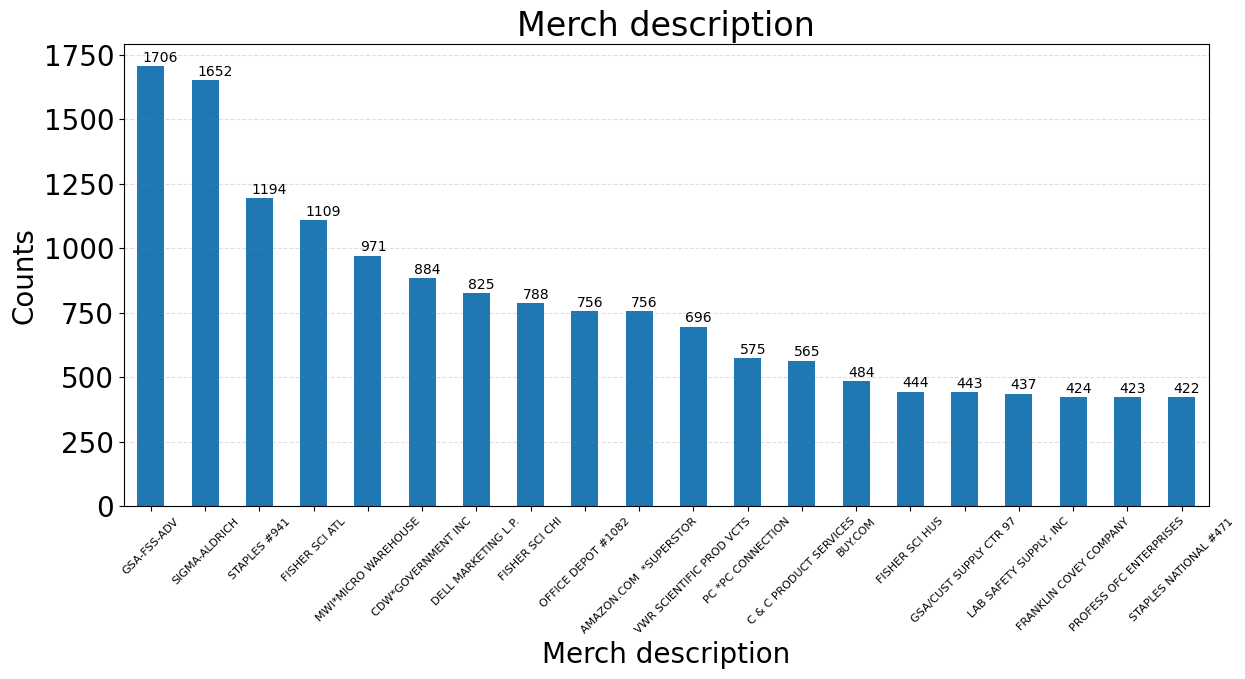

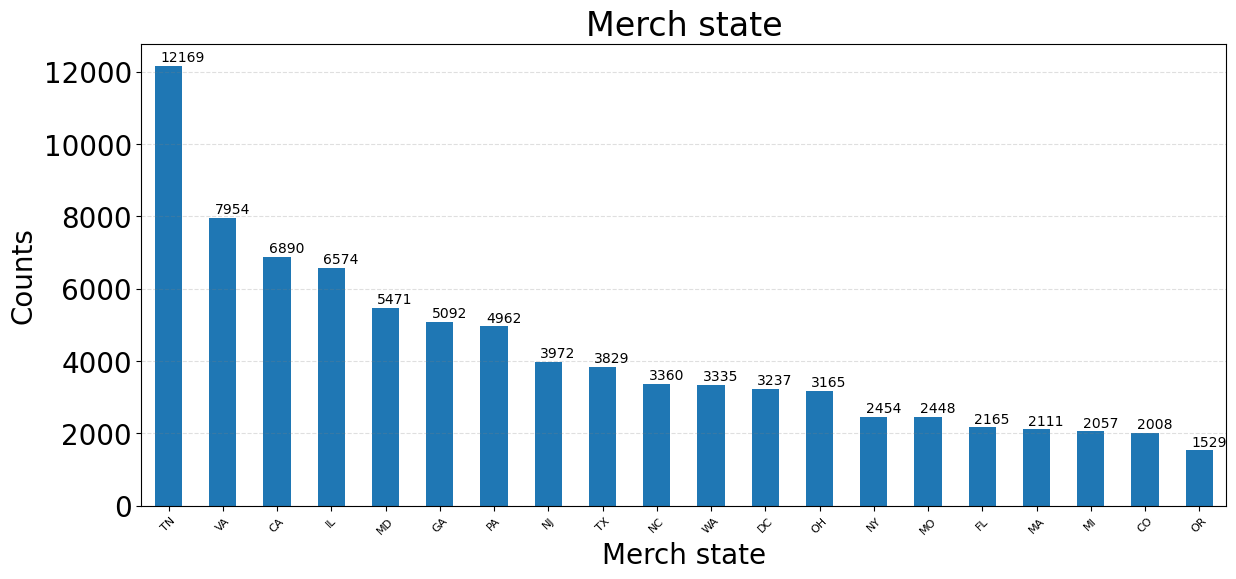

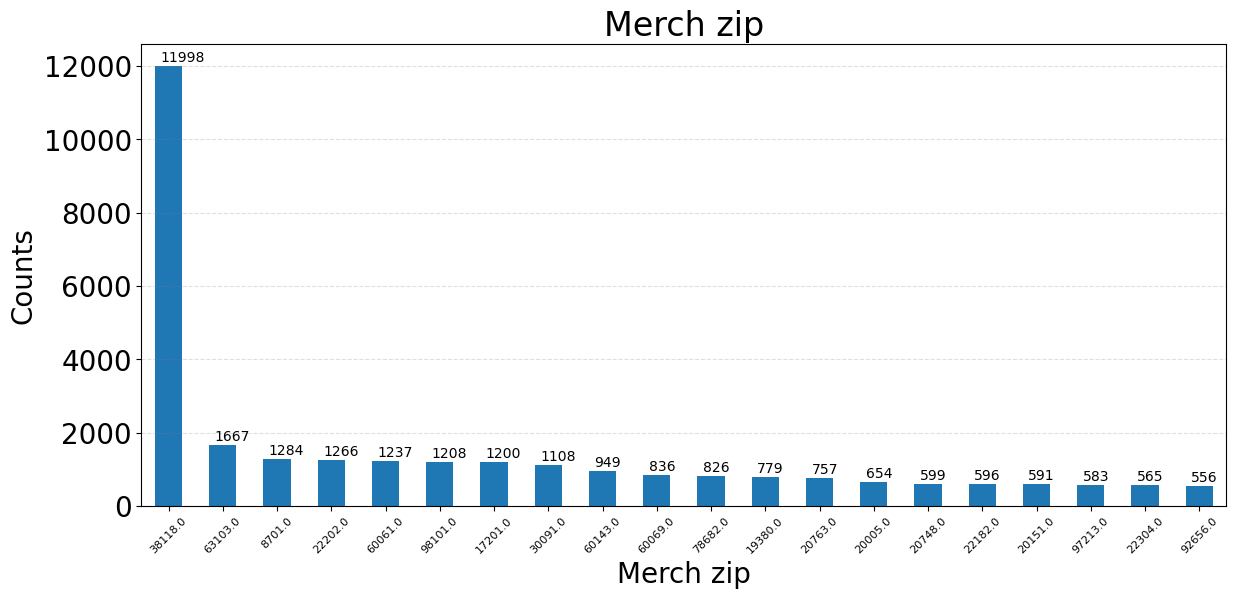

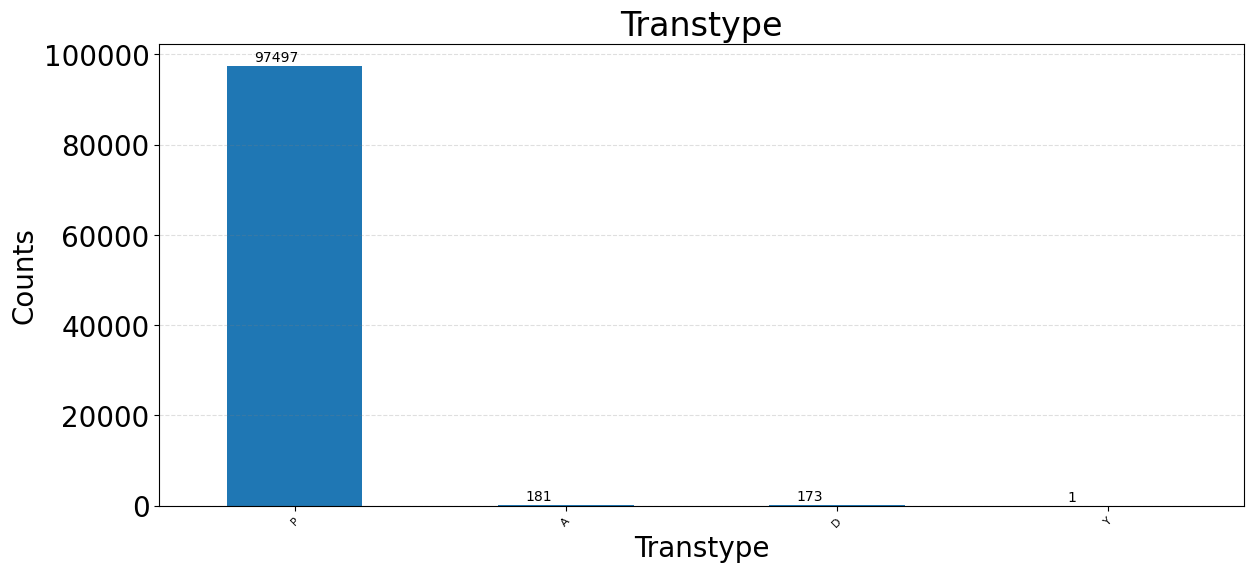

In [111]:
# plot categorical histograms if desired
for col in categoricals.columns:
    counts = data[col].value_counts().head(20)
    ax = counts.plot(kind='bar')
    plt.xticks(rotation=45)
    for i, v in enumerate(counts):
        ax.text(i - 0.15, v + counts.max()*0.01, f"{v}", color='black', fontsize=10)

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Counts')

    ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
    ax.tick_params(axis='x', labelsize=8)
    plt.show()

## Temporal

In [112]:
data.set_index('Date', inplace=True)

In [118]:
daily_counts

Date
2010-01-01     53
2010-01-02     32
2010-01-03    173
2010-01-04    263
2010-01-05    319
             ... 
2010-12-27    199
2010-12-28    216
2010-12-29    263
2010-12-30    200
2010-12-31     53
Freq: D, Length: 365, dtype: int64

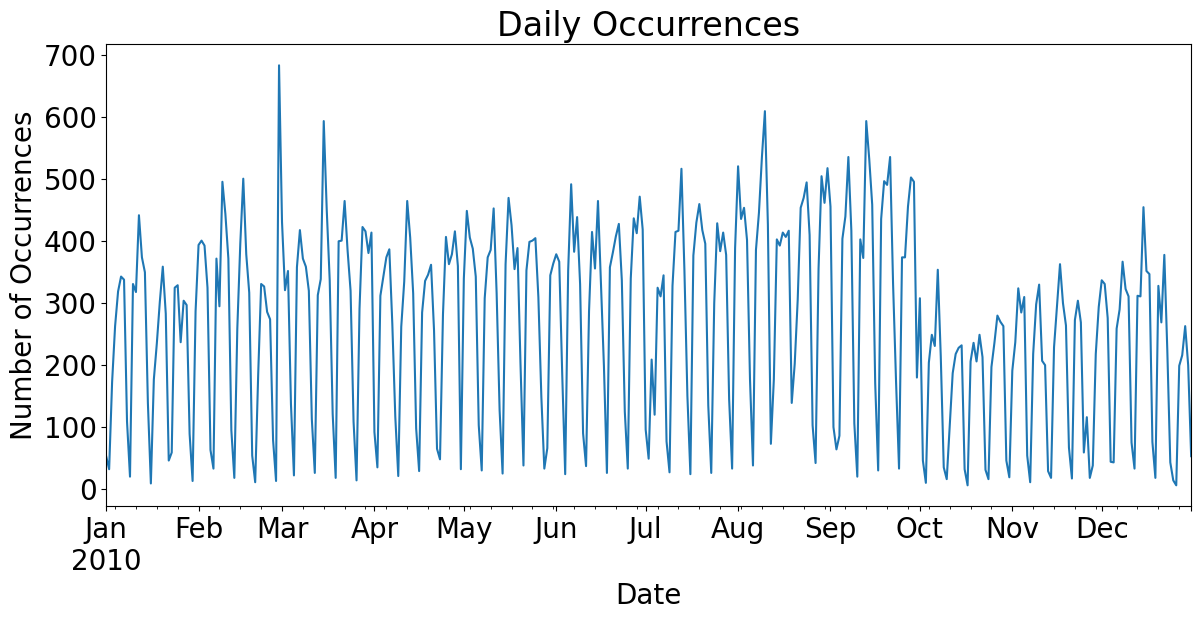

In [117]:
daily_counts = data.resample('D').size()
daily_counts.plot(kind='line')
plt.title('Daily Occurrences')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.show()


In [116]:
daily_counts

Date
2010-01-31     6955
2010-02-28     7796
2010-03-31     9421
2010-04-30     7796
2010-05-31     9117
2010-06-30     9313
2010-07-31     8477
2010-08-31    11178
2010-09-30    10072
2010-10-31     5138
2010-11-30     5836
2010-12-31     6753
Freq: M, dtype: int64

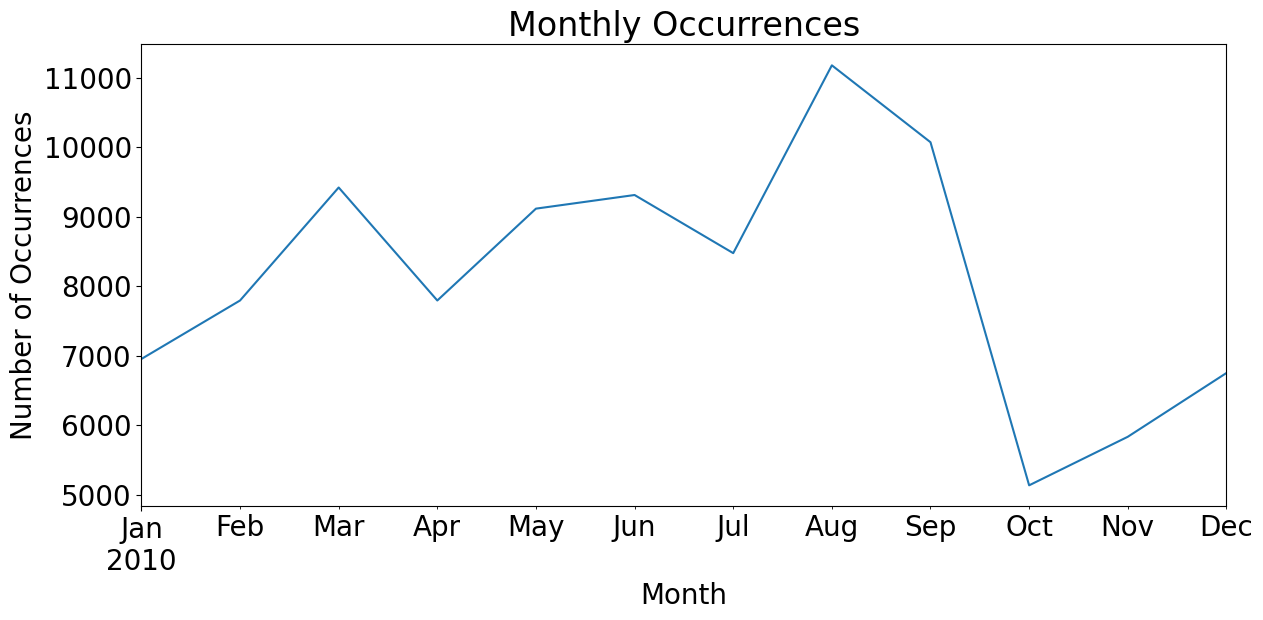

In [115]:
daily_counts = data.resample('M').size()
daily_counts.plot(kind='line')
plt.title('Monthly Occurrences')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.show()


## The cell below is for supervised problem with a dependent variable y. It looks at the univariate relationship between x and y.

overall response rate is:  0.02091934758615051
97852 different values for Recnum
1645 different values for Cardnum
365 different values for Date
13091 different values for Merchnum
13126 different values for Merch description
227 different values for Merch state
4567 different values for Merch zip


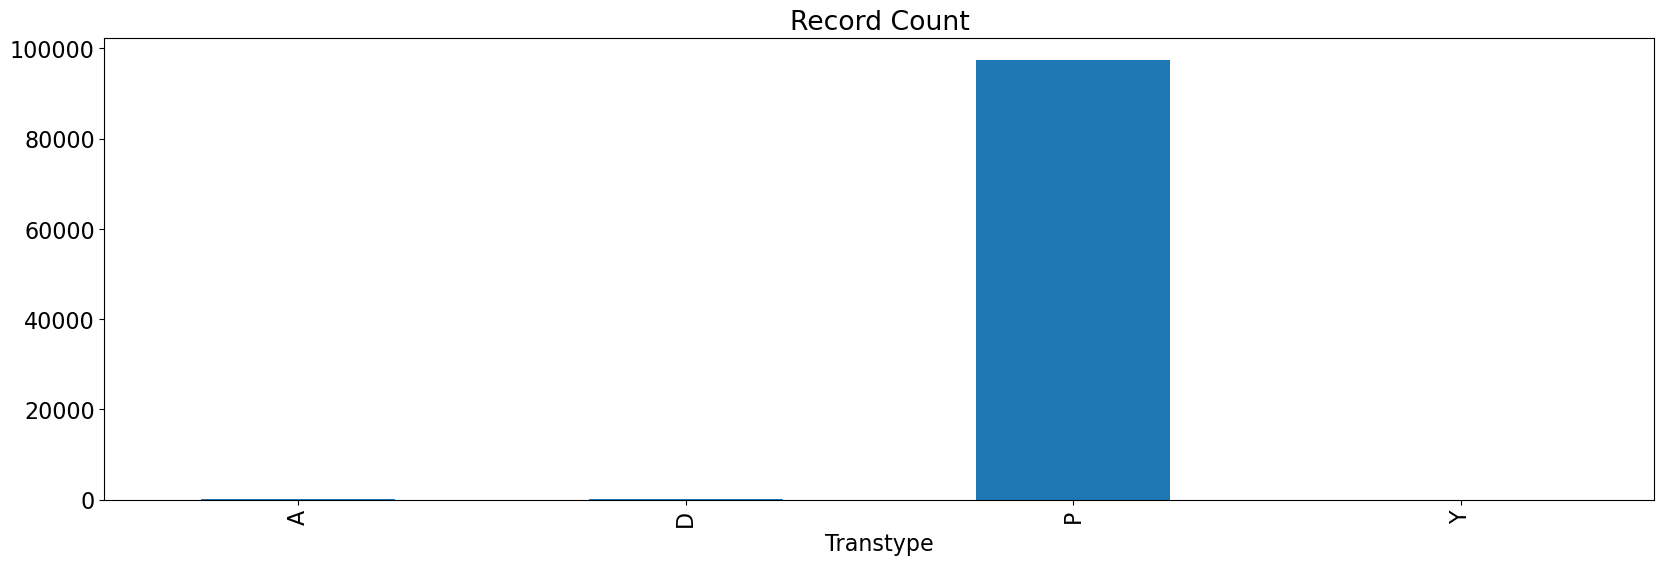

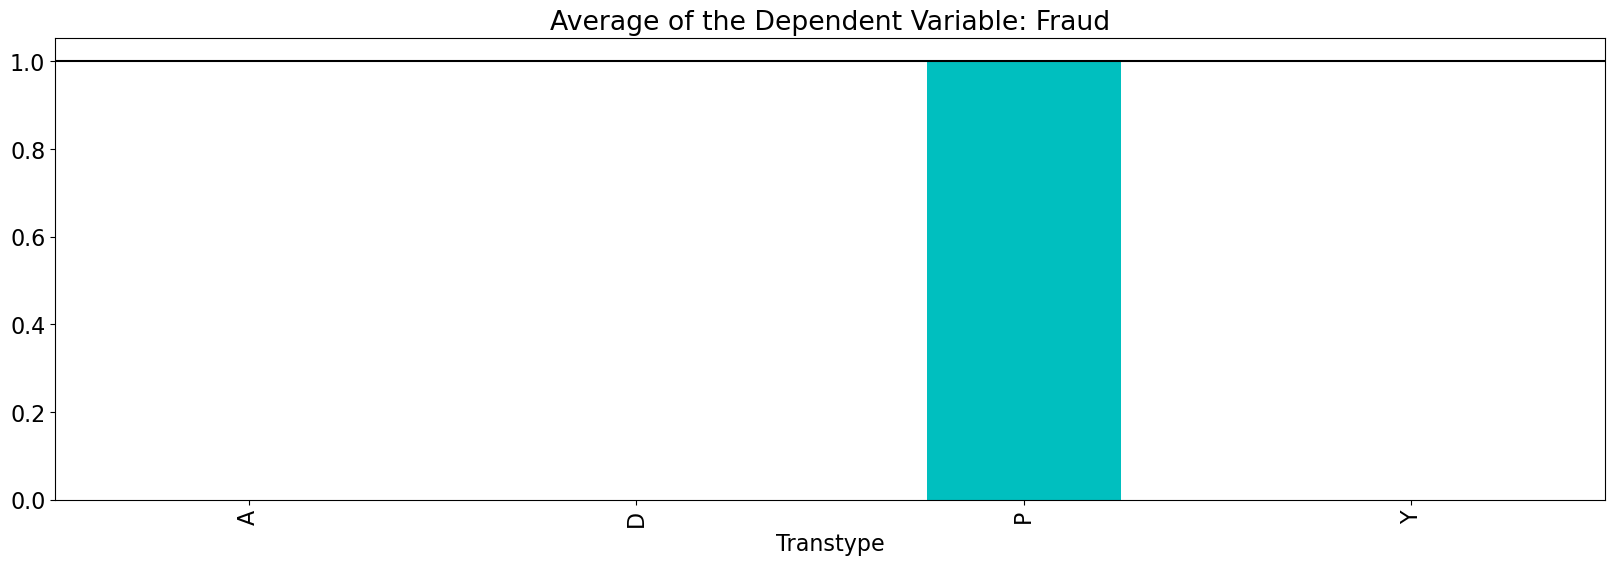

35331 different values for Amount


In [ ]:
dep_var = 'Fraud'

# sometimes need to convert the dependent variable to a number:
data[dep_var].replace('no',0,inplace=True)
data[dep_var].replace('yes',1,inplace=True)

rate = data[dep_var].mean()

print('overall response rate is: ', rate)
# Plot field distributions and compare with average of the dependent variable y (horizontal line)
plt.rcParams["figure.figsize"] = [20,6]
plt.rcParams.update({'font.size': 16})
plot_cols=data.columns.tolist()
plot_cols.remove(dep_var)
for col in plot_cols:
    num = data[col].nunique()
    if num > 100:
        print(num,"different values for",col)
    else:
        plt.title('Record Count')
        plt.xlabel(col)
        data[col].value_counts().sort_index().plot(kind='bar')
        temp = data.groupby(col)[dep_var].mean() / rate
        plt.show()
        plt.xlabel(col)
        str = 'Average of the Dependent Variable: '+dep_var
        plt.title(str)
        plt.axhline(1,color='black')
        temp.plot(kind='bar',color='c')
        plt.show()

In [ ]:
print('duration: ', dt.datetime.now() - start_time)

duration:  0:00:31.557254
